In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

terror = pd.read_csv("../data/globalterrorismdb_0617dist.csv", encoding='ISO-8859-1')

/tmp/ipykernel_3064/3357706738.py:6: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terror = pd.read_csv("../data/globalterrorismdb_0617dist.csv", encoding='ISO-8859-1')


In [4]:
terror

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,201612310040,2016,12,31,NaN,0,NaN,146,Niger,11,...,NaN,"""15 soldiers killed, 19 injured in Niger terro...","""Niger: Boko Haram attack kills two soldiers i...",NaN,START Primary Collection,1,1,0,1,NaN
170346,201612310042,2016,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""AFP braces for more BIFF attacks in ARMM,"" Ma...","""Asia: US Army ASD Philippine Terrorist Media ...",NaN,START Primary Collection,-9,-9,0,-9,NaN
170347,201612310043,2016,12,31,NaN,1,NaN,229,Democratic Republic of the Congo,11,...,NaN,"""DRC Armed Forces Dislodge Ugandan LRA Rebels ...",NaN,NaN,START Primary Collection,1,1,0,1,NaN
170348,201612310044,2016,12,31,NaN,0,NaN,130,Mexico,1,...,There is doubt that this incident meets terror...,"""Gunmen shoot at home of Mexican indigenous ri...",""" Gunmen shoot at home of Mexican indigenous ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


<h1>STEP1</h1>

데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화.

In [5]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day',\
                       'country_txt':'Country','region_txt':'Region',\
                        'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',\
                            'nwound':'Wounded','summary':'Summary','gname':'Group',\
                                'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                                'motive':'Motive'},inplace=True)

terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         170350 non-null  int64  
 1   Month        170350 non-null  int64  
 2   Day          170350 non-null  int64  
 3   Country      170350 non-null  object 
 4   Region       170350 non-null  object 
 5   city         169903 non-null  object 
 6   latitude     165744 non-null  float64
 7   longitude    165744 non-null  float64
 8   AttackType   170350 non-null  object 
 9   Killed       160668 non-null  float64
 10  Wounded      155025 non-null  float64
 11  Target       169712 non-null  object 
 12  Summary      104212 non-null  object 
 13  Group        170350 non-null  object 
 14  Target_type  170350 non-null  object 
 15  Weapon_type  170350 non-null  object 
 16  Motive       48586 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 22.1+ MB


In [6]:
terror['tmp_happen'] = [1] * 170350

terror

/tmp/ipykernel_3064/726637872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror['tmp_happen'] = [1] * 170350


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,2016,12,31,Niger,Sub-Saharan Africa,Garoua,13.883032,13.177504,Unknown,15.0,7.0,Soldiers,12/31/2016: Assailants attacked military posit...,Boko Haram,Military,Unknown,NaN,1
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,1
170347,2016,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Nakolongbo,4.308611,25.091389,Hostage Taking (Kidnapping),0.0,NaN,Village,12/31/2016: Assailants attacked a village and ...,Lord's Resistance Army (LRA),Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",1
170348,2016,12,31,Mexico,North America,Guachochi,26.819644,-107.069898,Assassination,0.0,0.0,Residence of Journalist: Gabriel Valencia Juarez,12/31/2016: Assailants opened fire on the hous...,Unknown,Journalists & Media,Firearms,NaN,1


In [7]:
terroryear = terror.pivot_table(index = ['Year'], values = ['tmp_happen'], aggfunc = np.sum)

terroryear

/tmp/ipykernel_3064/3505710930.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terroryear = terror.pivot_table(index = ['Year'], values = ['tmp_happen'], aggfunc = np.sum)


,tmp_happen
Year,
1970,651
1971,470
1972,496
1973,473
1974,580
1975,740
1976,923
1977,1319
1978,1526


In [8]:
terroryear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1970 to 2016
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tmp_happen  46 non-null     int64
dtypes: int64(1)
memory usage: 736.0 bytes


In [9]:
terroryear['tmp_happen'].sum()

170350

<h3>올바른 결과이다. 열의 개수와 총 합이 같기 때문. 이를 이용하여 막대그래프로 연도별 테러 건수를 분석.</h3>

/home/bo/class/venv/eda_venv/lib/python3.10/site-packages/matplotlib/text.py:753: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/bo/class/venv/eda_venv/lib/python3.10/site-packages/matplotlib/text.py:894: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


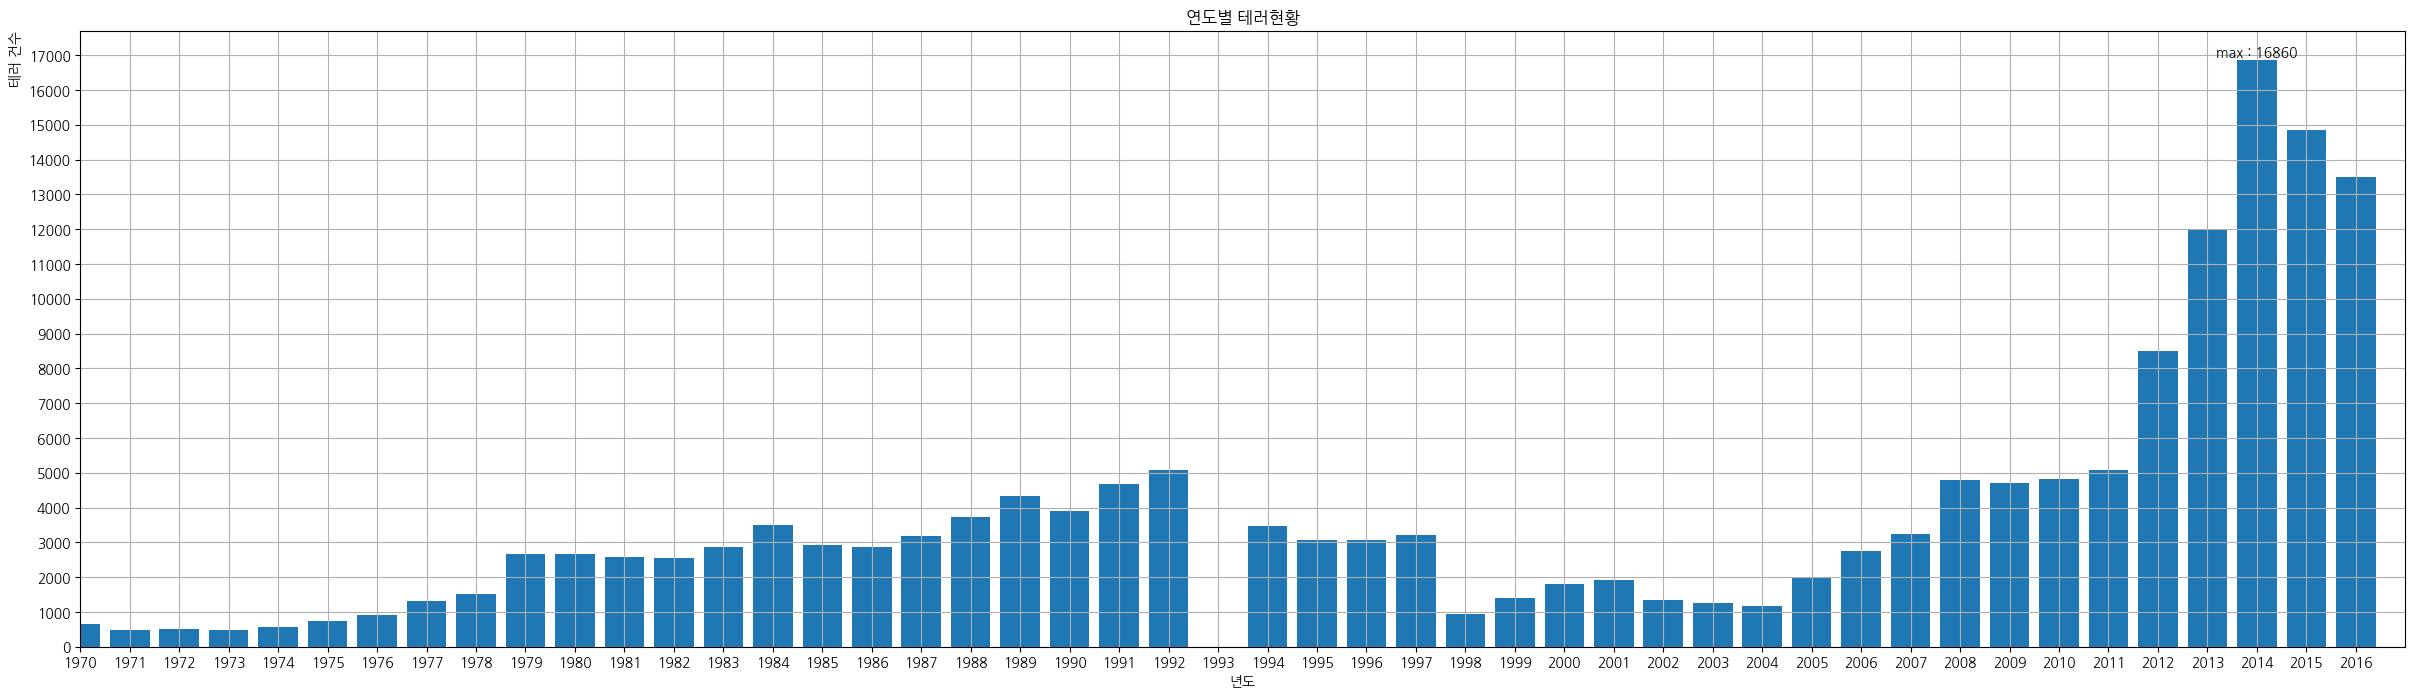

In [10]:
plt.figure(figsize=(30, 8))
plt.title("연도별 테러현황")
plt.bar(terroryear.index,terroryear['tmp_happen'])
plt.xlabel('년도')
plt.xticks(np.arange(1970, 2017, 1))
plt.yticks(np.arange(0, 18000, 1000))
plt.ylabel('테러 건수', loc='top')
plt.xlim(1970, 2017)
plt.text(terroryear.idxmax(),terroryear.max().values[0]+100,"max : {}".format(terroryear.max().values[0]),ha='center')
plt.grid()
plt.show()

<h1>Step2.<h2>전세계 테러데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화</h2></h1>

<h3>인덱스는 Country
값은 tmp_happen
column은 나머지</h3>

In [11]:
terror_country1= terror.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_country1.sort_values('tmp_happen', ascending=False, inplace= True)

terror_country1.head(10)

/tmp/ipykernel_3064/3228238267.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_country1= terror.pivot_table(index = ['Country'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Country,
Iraq,22130
Pakistan,13634
Afghanistan,11306
India,10978
Colombia,8163
Philippines,6212
Peru,6088
El Salvador,5320
United Kingdom,5098


<h1>Step3. <h2>Step1의 특정연도 이전의 테러 경향과 그 후의 테러 경향 차이 확인</h2></h1>

2012년도 전 후 데이터 분석

In [12]:
#2012년 이전과 이후를 비교하기 위해 두개의 피벗테이블 분류
condition1 = terror['Year'] < 2012
condition2 = terror['Year'] >= 2012

terror_2012before = terror[condition1]
terror_2012after = terror[condition2]

In [13]:
terror_2012before

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104649,2011,12,31,Iraq,Middle East & North Africa,Khan Bani Saad,33.571807,44.536067,Armed Assault,5.0,0.0,5 Sahwa Militia members,12/31/2011: Five members of the Sahwa militia ...,Al-Qaida in Iraq,Terrorists/Non-State Militia,Firearms,Unknown,1
104650,2011,12,31,Pakistan,South Asia,Landi Kotal,34.116779,71.166515,Bombing/Explosion,2.0,13.0,Civilians,12/31/2011: Two children were killed and thirt...,Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,Unknown,1
104651,2011,12,31,Iraq,Middle East & North Africa,Kirkuk,35.468830,44.390980,Bombing/Explosion,0.0,1.0,Civilian,12/31/2011: A civilian was wounded when a stic...,Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,Unknown,1
104652,2011,12,31,Pakistan,South Asia,Boya,32.945308,69.897046,Bombing/Explosion,2.0,NaN,2 Pakistani soldiers,"12/31/2011: A remote-triggered, homemade roads...",Tehrik-i-Taliban Pakistan (TTP),Military,Explosives/Bombs/Dynamite,Unknown,1


In [14]:
terror_2012after

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,tmp_happen
104654,2012,1,1,Pakistan,South Asia,Quetta,30.209423,67.018009,Bombing/Explosion,0.0,12.0,Paan Shop,01/01/2012: A grenade was thrown into a shop o...,Unknown,Business,Explosives/Bombs/Dynamite,NaN,1
104655,2012,1,1,Kenya,Sub-Saharan Africa,Garissa,-0.456120,39.646123,Armed Assault,3.0,14.0,Bar,01/01/2012: Assailants threw two grenades and ...,Al-Shabaab,Business,Explosives/Bombs/Dynamite,"The specific motive is unknown; however, Al-Sh...",1
104656,2012,1,1,Pakistan,South Asia,Sui,28.636116,69.186465,Bombing/Explosion,4.0,3.0,Soldiers,01/01/2012: A convoy of Frontier Corps (FC) so...,Baloch Republican Army (BRA),Military,Explosives/Bombs/Dynamite,NaN,1
104657,2012,1,1,Kenya,Sub-Saharan Africa,Garissa,-0.456120,39.646123,Armed Assault,2.0,14.0,Bar,01/01/2012: Assailants threw a grenade and ope...,Al-Shabaab,Business,Explosives/Bombs/Dynamite,"The specific motive is unknown; however, Al-Sh...",1
104658,2012,1,1,Pakistan,South Asia,Peer Chhatta,28.466667,67.283333,Hostage Taking (Kidnapping),0.0,0.0,Civilians,01/01/2012: Four men were kidnapped from their...,Unknown,Private Citizens & Property,Firearms,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,2016,12,31,Niger,Sub-Saharan Africa,Garoua,13.883032,13.177504,Unknown,15.0,7.0,Soldiers,12/31/2016: Assailants attacked military posit...,Boko Haram,Military,Unknown,NaN,1
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,1
170347,2016,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Nakolongbo,4.308611,25.091389,Hostage Taking (Kidnapping),0.0,NaN,Village,12/31/2016: Assailants attacked a village and ...,Lord's Resistance Army (LRA),Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",1
170348,2016,12,31,Mexico,North America,Guachochi,26.819644,-107.069898,Assassination,0.0,0.0,Residence of Journalist: Gabriel Valencia Juarez,12/31/2016: Assailants opened fire on the hous...,Unknown,Journalists & Media,Firearms,NaN,1


이들을 대륙으로 묶어 확인해보자.

In [15]:

terror_region2012b= terror_2012before.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_region2012b.sort_values('tmp_happen', ascending=True, inplace= True)

terror_region2012b

/tmp/ipykernel_3064/1828051078.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_region2012b= terror_2012before.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Region,
Australasia & Oceania,230
Central Asia,501
East Asia,698
Eastern Europe,2912
North America,3107
Southeast Asia,6451
Sub-Saharan Africa,7048
Central America & Caribbean,10316
Western Europe,15044


In [16]:

terror_region2012a= terror_2012after.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)

terror_region2012a.sort_values('tmp_happen', ascending=True, inplace= True)

terror_region2012a

/tmp/ipykernel_3064/442949783.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_region2012a= terror_2012after.pivot_table(index = ['Region'],values=['tmp_happen'], aggfunc=np.sum, fill_value=0)


,tmp_happen
Region,
Central America & Caribbean,24
Australasia & Oceania,34
Central Asia,53
East Asia,96
North America,239
South America,902
Western Europe,1263
Eastern Europe,2119
Southeast Asia,5002


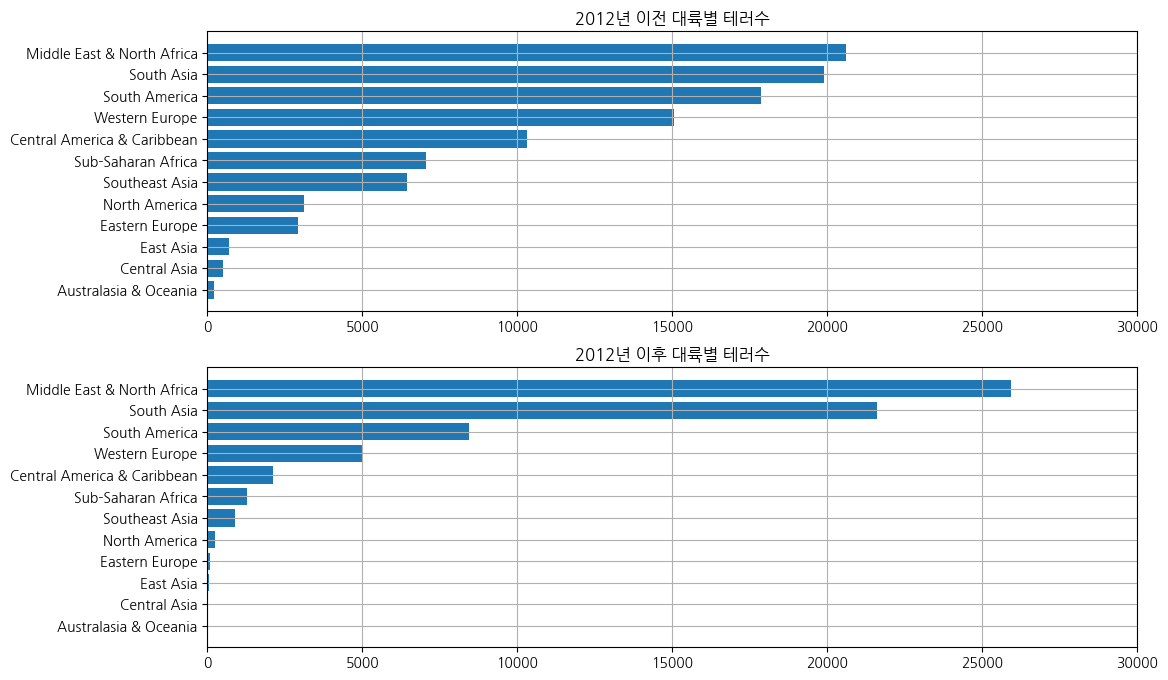

In [17]:

fig, ax = plt.subplots(2,1, figsize = (12, 8))


ax[0].barh(terror_region2012b.index, terror_region2012b['tmp_happen'])
ax[0].set_title("2012년 이전 대륙별 테러수")
ax[0].set_xlim([0, 30000])

ax[1].barh(terror_region2012b.index, terror_region2012a['tmp_happen'])
ax[1].set_title("2012년 이후 대륙별 테러수")
ax[1].set_xlim([0, 30000])

ax[0].grid()
ax[1].grid()
plt.show()

2012년 이전/이후 중동지역과 북아프리카, 남아시아는 테러수가 증가
남미는 테러수는 낮아졌지만 그래도 유의미한 값으로 존재

그래프에서 2012년의 전후로 추이를 살펴보기 위해 y축의 순서는 2012년 이전 그래프로 동일하게 맞추었음.

그래프의 전반적인 모양은 변하지 않았지만 
중동&북아프리카, 남아시아에 비해 다른 국가들은 절반 이상 줄었다고 볼 수 있음.

심지어 1,2위 대륙은 늘어났음.

In [18]:
terror_region=terror.pivot_table(index = ['Region', 'Year'],values=['tmp_happen'], aggfunc=np.sum)

terror_region.astype(int)

terror_region

/tmp/ipykernel_3064/3846118668.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_region=terror.pivot_table(index = ['Region', 'Year'],values=['tmp_happen'], aggfunc=np.sum)


tmp_happen
Region                Year            
Australasia & Oceania 1970           1
                      1971           1
                      1972           2
                      1973           1
                      1974           1
...                                ...
Western Europe        2012         190
                      2013         254
                      2014         215
                      2015         335
                      2016         269

[516 rows x 1 columns]

0


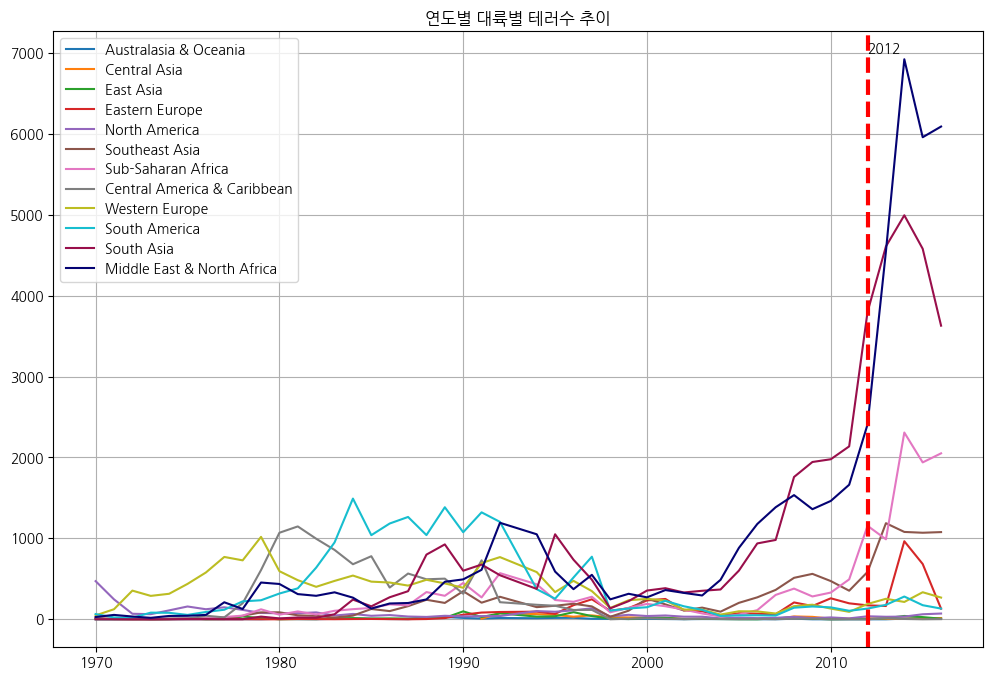

In [19]:
plt.figure(figsize=(12, 8))
plt.title("연도별 대륙별 테러수 추이")
count = 0
regionlist = ['Australasia & Oceania', 'Central Asia', 'East Asia', 'Eastern Europe',
       'North America', 'Southeast Asia', 'Sub-Saharan Africa',
       'Central America & Caribbean', 'Western Europe', 'South America',
       'South Asia', 'Middle East & North Africa']
colorlist = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',\
                '#17becf', '#990f4b', '#040273', '#0b8b87']
ci = 0
for cnty in regionlist:
    tmp_terror_region = terror_region.loc[cnty]
    
    plt.plot(tmp_terror_region.index , tmp_terror_region, label = '{}'.format(cnty), color = colorlist[ci])
    ci +=1 
   
print(count)
plt.xticks(np.arange(1970, 2017, 10))
plt.axvline(x = 2012, color = 'r', linestyle='--', linewidth = 3)
plt.text(2012, 7000, '2012')
plt.grid()
plt.legend()
plt.show()

12년도 전/후 추이를 보았을 때 눈여겨 보아야할 대륙 : 중동&북아프리카지역과 사하라이남 아프리카

'Middle East & North Africa', 'Sub-Saharan Africa'

step2에서 분석한 상위 10개국
+
이라크, 파키스탄, 아프가니스탄, 인도, 콜롬비아, 필리핀, 페루, 엘살파도르, 영국, 튀르키에

In [20]:
terror_killed = terror.pivot_table(index = ['Region'],values=['Killed'], aggfunc=np.sum, fill_value= 0 )

terror_killed.astype(int)
terror_killed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Australasia & Oceania to Western Europe
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Killed  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


/tmp/ipykernel_3064/3009491567.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terror_killed = terror.pivot_table(index = ['Region'],values=['Killed'], aggfunc=np.sum, fill_value= 0 )


STEP4. 
중동&북아프리카 지역과 남아메리카, 서유럽 남동아시아 총 4개의 지역별로 테러공격형태, 사망자와 사상자의 수등 지역별 특성 차이가 존재하는지

우선 4개 대륙별 공격타입 분포도이다.

In [21]:
import seaborn as sns



In [25]:
terrorattacktype = terror.pivot_table(index = ['Region'], columns= ['AttackType'], values = ['tmp_happen'], aggfunc = np.sum)
terrorattacktype_4 = terrorattacktype.copy()
terrorattacktype_4.columns=terrorattacktype_4.columns.droplevel([0])
terrorattacktype_4 = terrorattacktype_4.loc[['Middle East & North Africa', 'South America', 'Western Europe', 'Southeast Asia'],:]
terrorattacktype_4

/tmp/ipykernel_3064/1510068331.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terrorattacktype = terror.pivot_table(index = ['Region'], columns= ['AttackType'], values = ['tmp_happen'], aggfunc = np.sum)


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Region,,,,,,,,,
Middle East & North Africa,8740,4060,28314,1049,126,87,2417,164,1554
South America,3824,2713,8977,776,66,229,1378,47,752
Western Europe,1657,2909,8424,2513,63,86,269,126,260
Southeast Asia,3736,1237,4476,838,43,47,669,23,384


In [27]:
attacktypelist = list(terrorattacktype_4.columns)

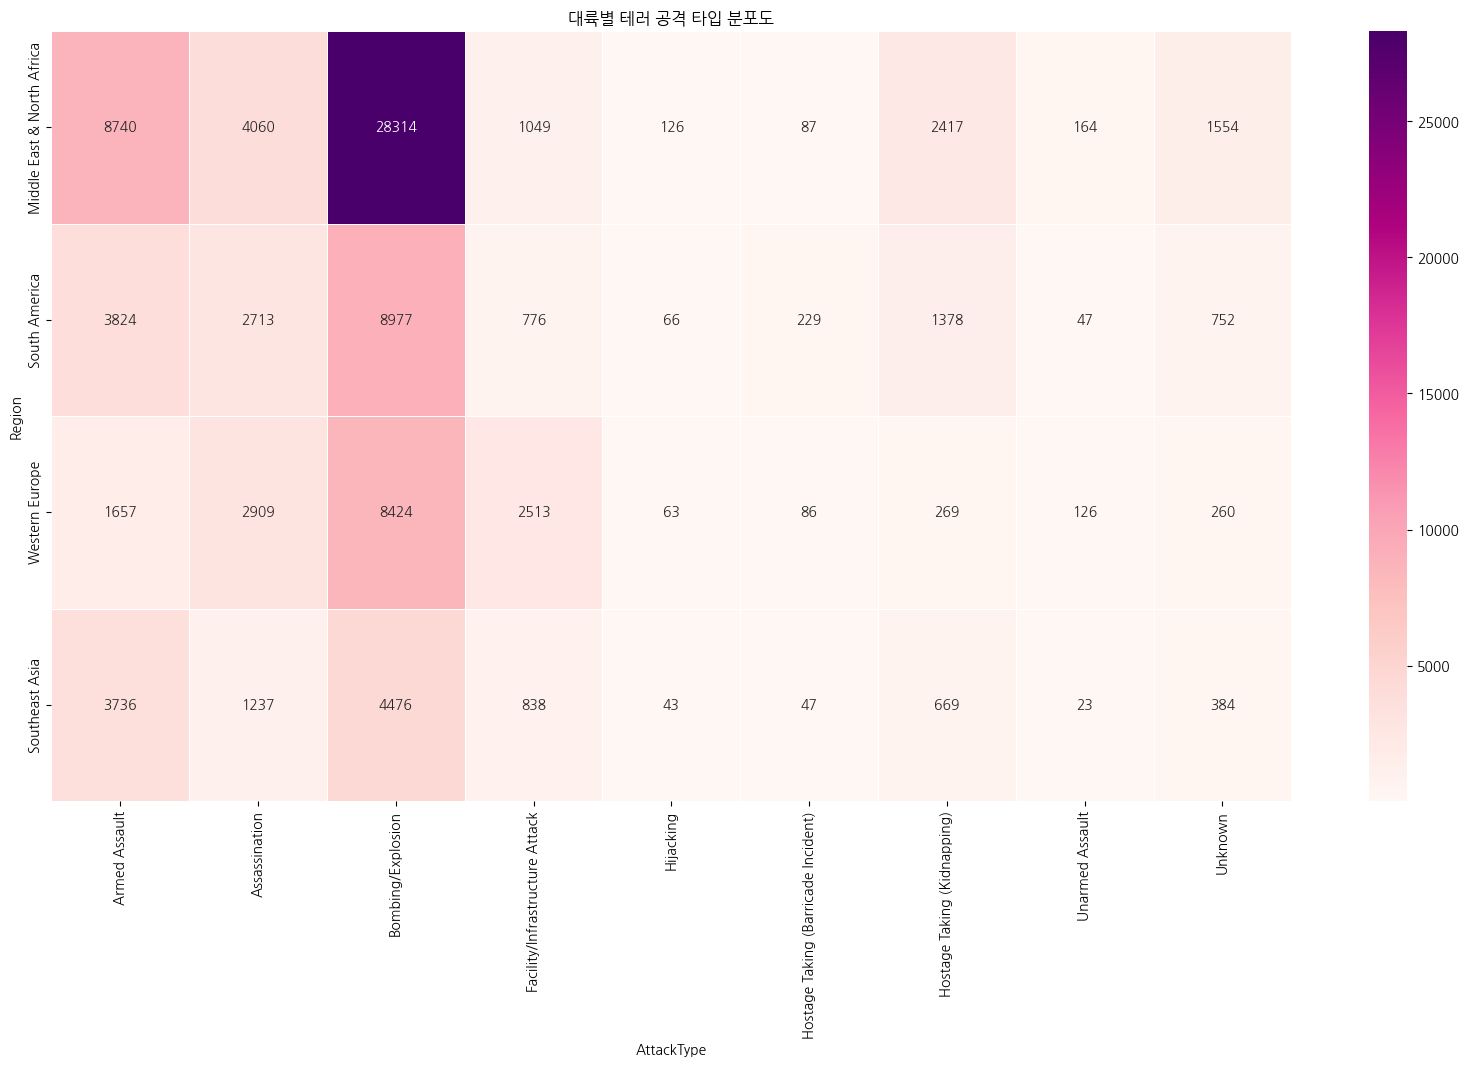

In [28]:
plt.figure(figsize=(20, 10))
sns.heatmap(terrorattacktype_4[attacktypelist], annot=True, fmt = 'd', linewidths= .5, cmap = "RdPu")
plt.title("대륙별 테러 공격 타입 분포도")
plt.show()

In [29]:
daruk4 = ['Middle East & North Africa', 'South America', 'Western Europe', 'Southeast Asia']

대륙별 태러 타입에 따른 사상자 수이다.

In [30]:
terrorvictims = terror.pivot_table(index = ['Region', 'AttackType'],  values = ['Killed' , 'Wounded'], aggfunc = np.sum, fill_value=0)

/tmp/ipykernel_3064/2356585006.py:1: FutureWarning: The provided callable <function sum at 0x7d76783285e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  terrorvictims = terror.pivot_table(index = ['Region', 'AttackType'],  values = ['Killed' , 'Wounded'], aggfunc = np.sum, fill_value=0)


In [32]:
terrorvictims['victims'] = terrorvictims['Killed'] + terrorvictims['Wounded']

In [33]:
terrorvictims
terrorvictims=terrorvictims.astype(int)
terrorvictims=terrorvictims.loc[daruk4]
terrorvictims


Killed  \
Region                     AttackType                                    
Middle East & North Africa Armed Assault                         24951   
                           Assassination                          4662   
                           Bombing/Explosion                     74797   
                           Facility/Infrastructure Attack          790   
                           Hijacking                               124   
                           Hostage Taking (Barricade Incident)     658   
                           Hostage Taking (Kidnapping)           10983   
                           Unarmed Assault                         118   
                           Unknown                                8593   
South America              Armed Assault                         16751   
                           Assassination                          4224   
                           Bombing/Explosion                      4296   
                           Facility/Infrastructure Attack          238   
                           Hijacking                                16   
                           Hostage Taking (Barricade Incident)      36   
                           Hostage Taking (Kidnapping)            1057   
                           Unarmed Assault                          75   
                           Unknown                                2037   
Western Europe             Armed Assault                           943   
                           Assassination                          2672   
                           Bombing/Explosion                      2488   
                           Facility/Infrastructure Attack           58   
                           Hijacking                               126   
                           Hostage Taking (Barricade Incident)     168   
                           Hostage Taking (Kidnapping)              78   
                           Unarmed Assault                          32   
                           Unknown                                  30   
Southeast Asia             Armed Assault                          7444   
                           Assassination                          1504   
                           Bombing/Explosion                      3662   
                           Facility/Infrastructure Attack          150   
                           Hijacking                               151   
                           Hostage Taking (Barricade Incident)     205   
                           Hostage Taking (Kidnapping)             429   
                           Unarmed Assault                          30   
                           Unknown                                1244   

                                                                Wounded  \
Region                     AttackType                                     
Middle East & North Africa Armed Assault                          14108   
                           Assassination                           4386   
                           Bombing/Explosion                     180316   
                           Facility/Infrastructure Attack           672   
                           Hijacking                                 66   
                           Hostage Taking (Barricade Incident)      591   
                           Hostage Taking (Kidnapping)             1394   
                           Unarmed Assault                          646   
                           Unknown                                 3071   
South America              Armed Assault                           3840   
                           Assassination                            654   
                           Bombing/Explosion                      10823   
                           Facility/Infrastructure Attack           143   
                           Hijacking                                  9   
                           Hostage Taking (Barricad

In [34]:
terrorvictims.index

MultiIndex([('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            ('Middle East & North Africa', ...),
            (             'South America', ...),
            (             'South America', ...),
            (             'South America', ...),
            (             'South America', ...),
            (             'South America', ...),
            (             'South America', ...),
            (             'South America', ...),
            (             'South America', ...),
            (             'South America', ...),
            (            'Western Europe', ...),
            (            'Western Europe', ...),
            (       

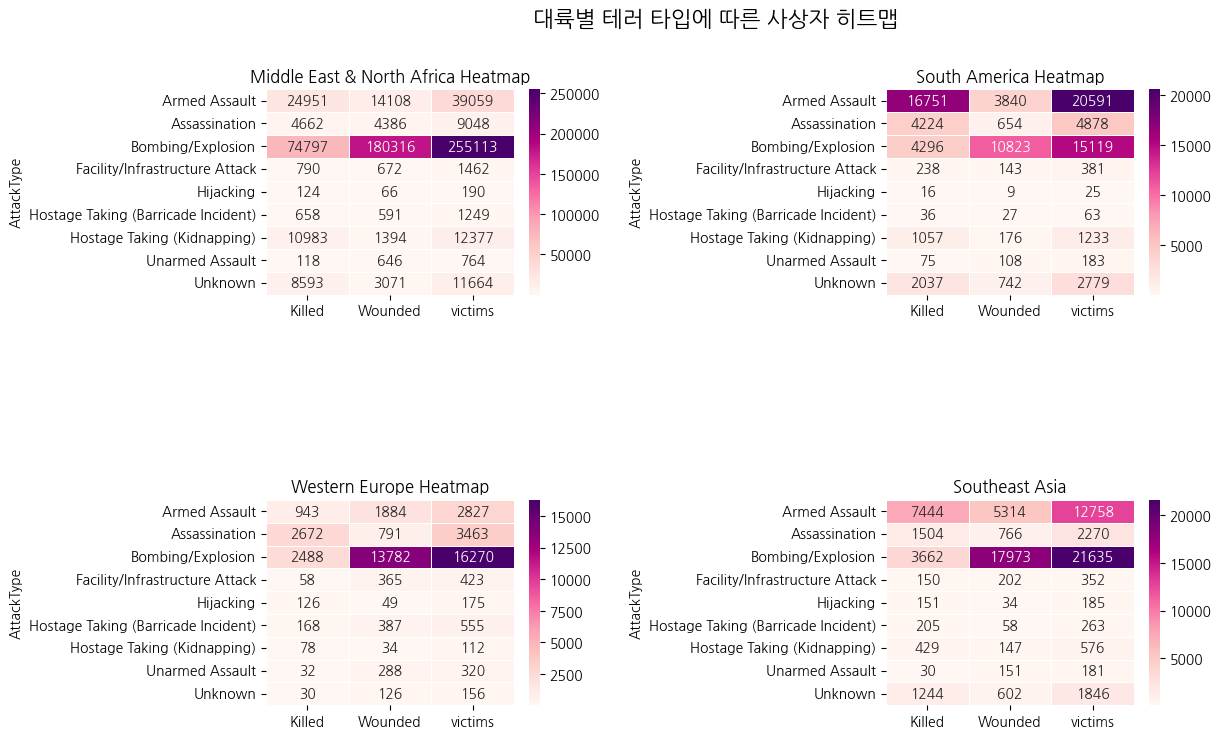

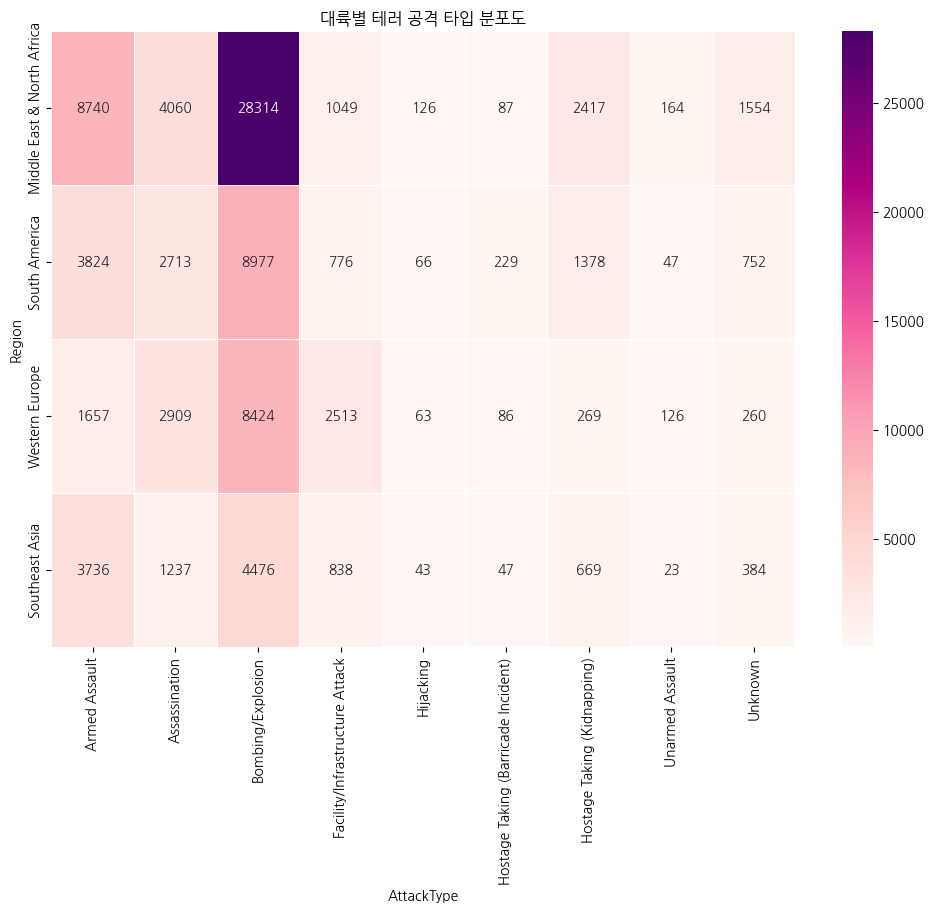

In [37]:
fig, ax = plt.subplots(2, 2, figsize = (12,8))
sns.heatmap(terrorvictims.loc['Middle East & North Africa'],ax = ax[0,0], annot=True, fmt = 'd', linewidths= .5, cmap = "RdPu")
ax[0, 0].set_title('Middle East & North Africa Heatmap')

sns.heatmap(terrorvictims.loc['South America'],ax = ax[0,1], annot=True, fmt = 'd', linewidths= .5, cmap = "RdPu")
ax[0, 1].set_title('South America Heatmap')

sns.heatmap(terrorvictims.loc['Western Europe'],ax = ax[1,0], annot=True, fmt = 'd', linewidths= .5, cmap = "RdPu")
ax[1, 0].set_title('Western Europe Heatmap')

sns.heatmap(terrorvictims.loc['Southeast Asia'],ax = ax[1,1], annot=True, fmt = 'd', linewidths= .5, cmap = "RdPu")
ax[1, 1].set_title('Southeast Asia')t

plt.subplots_adjust(hspace=1, wspace=1)
fig.suptitle('대륙별 테러 타입에 따른 사상자 히트맵', fontsize=16)

plt.figure(figsize=(12, 8))
sns.heatmap(terrorattacktype_4[attacktypelist], annot=True, fmt = 'd', linewidths= .5, cmap = "RdPu")
plt.title("대륙별 테러 공격 타입 분포도")
plt.show()

plt.show()

중동/북아프리카 지역은 폭탄테러타입이 가장 많은 것을 볼 수 있고, 살상무기 또한 주를 이루고 있다. 다른 대륙은 중동과 북아프리카에 비해서는 적은 타입의 수지만 결국 테러의 대부분은 폭탄테러, 살상무기테러
암살테러라고 볼 수 있다. 
